Laboratory Work No.1 in the subject "Introduction to Machine Learning" by student of group DA-22, Maryna Korolova

<h4> Libraries that will be used in the work</h4>

In [1]:
# download data from google drive
import gdown
import csv

# Work with numbers
import numpy as np
import matplotlib.pyplot as plt

# Work with table for showing data
import pandas as pd 

<h4>Downloading data from drive</h4>

In [2]:
def download_data(url):

    csv_data = gdown.download(url, quiet=True)

    with open(csv_data, mode='r', newline='\n') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            data = [row for row in reader] 

    return data

url1 = 'https://drive.google.com/uc?id=1ZJ7USoXN5Iijv_j-o8igJKD6w5jr5QPF'
url2 = 'https://drive.google.com/uc?id=1Dtf7FRjjhAGEikPFYYXmBBEdFFFWa-kK'

training_data = download_data(url1)
test_data = download_data(url2)

<h4>Print data</h4>

In [3]:
def print_data(length, data, lable):
    print(lable[0])
    print("-" * ((length+5) * 3))

    print(f'{lable[1]:<{length + 5}} {lable[2]:<{length + 5}} {lable[3]:<{length + 5}}')
    print("-" * ((length+5) * 3)) 

    # Печать каждой строки массива
    for row in data:
        print(f"{float(row[0]):<{length + 5}} {float(row[1]):<{length + 5}.{length}f} {float(row[2]):<{length + 5}.{length}f}")

    print("-" * ((length+5) * 3)) 

print_data(6, training_data, lable = ["\n\nTraining Data Array:", "Index", "X", "Y"])
print_data(6, test_data, lable = ["\n\nTraining Data Array:", "Index", "X", "Y"])



Training Data Array:
---------------------------------
Index       X           Y          
---------------------------------
0.0         0.000000    20.149014  
1.0         0.010101    19.978723  
2.0         0.020202    20.234711  
3.0         0.030303    20.517515  
4.0         0.040404    20.010562  
5.0         0.050505    20.030769  
6.0         0.060606    20.594976  
7.0         0.070707    20.371645  
8.0         0.080808    20.020774  
9.0         0.090909    20.344586  
10.0        0.101010    20.062995  
11.0        0.111111    20.082503  
12.0        0.121212    20.315013  
13.0        0.131313    19.688642  
14.0        0.141414    19.765353  
15.0        0.151515    20.134344  
16.0        0.161616    20.019383  
17.0        0.171717    20.437709  
18.0        0.181818    20.091229  
19.0        0.191919    19.960147  
20.0        0.202020    20.843735  
21.0        0.212121    20.356510  
22.0        0.222222    20.464703  
23.0        0.232323    20.037222  
24.0     

<h4>Convert the data from the list to arrays</h4>

In [4]:

x_train = np.array([row[1] for row in training_data[1:]], dtype=float)
y_train = np.array([row[2] for row in training_data[1:]], dtype=float)

x_test = np.array([row[1] for row in test_data[1:]], dtype=float)
y_test = np.array([row[2] for row in test_data[1:]], dtype=float)

<h4> Visualization of data </h4>

Train dataset data


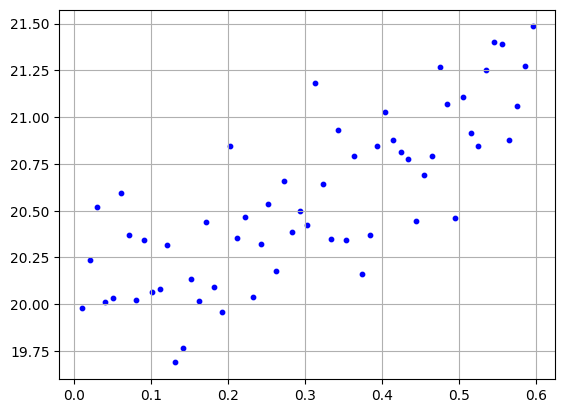

Test dataset data


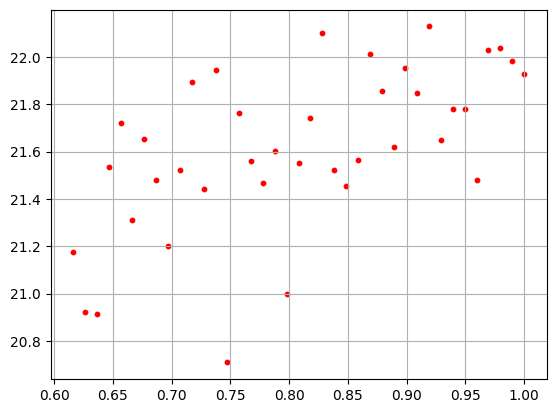

In [5]:
plt.scatter(x_train, y_train, color= "blue", s=10)
plt.grid(True)
print("Train dataset data")
plt.show()

plt.scatter(x_test, y_test, color= "red", s=10)
plt.grid(True)
print("Test dataset data")
plt.show()

<h4> Before performing the calculations, we will write the gradient formulas for our functions, after which we can calculate all the weights and loss functions</h4>

$$\theta_{j}=\theta_{j}-\alpha\dfrac{\partial }{\partial \theta_{j}}J\left( \theta_{0} \theta_{1} \right)\\ \\ \Downarrow  \\ \\
\theta_{0}=\theta_{0}-\alpha\dfrac{\partial }{\partial \theta_{0}}J\left( \theta_{0} \theta_{1} \right)\\ 
\theta_{1}=\theta_{1}-\alpha\dfrac{\partial }{\partial \theta_{1}}J\left( \theta_{0} \theta_{1} \right)\\\Downarrow  \\ \\
\theta_{0}=\theta_{0}-\alpha\dfrac{\partial }{\partial \theta_{0}}\left( \dfrac{1}{2m} \sum_{i=1}^{m}\left( \theta_{0}+\theta_{1}x_{i}-y_{i} \right)\right)\\
\theta_{1}=\theta_{1}-\alpha\dfrac{\partial }{\partial \theta_{1}}\left( \dfrac{1}{2m} \sum_{i=1}^{m}\left( \theta_{0}+\theta_{1}x_{i}-y_{i} \right)\right)\\ \\ \Downarrow  \\ \\
\theta_{0}=\theta_{0}-\alpha\left( \dfrac{1}{m} \sum_{i=1}^{m}\left( \theta_{0}+\theta_{1}x_{i}-y_{i} \right)\right)\\
\theta_{1}=\theta_{1}-\alpha\left( \dfrac{1}{m} \sum_{i=1}^{m}\left( \theta_{0}+\theta_{1}x_{i}-y_{i} \right)x_{i}\right)$$

In [6]:
b0_list = []
b1_list = []
loss_list = []
predicted_y=[]
step_list = []

b0=0
b1=0
learning_coef=0.1
step = 1500

b0_list.append(0)
b1_list.append(0)
loss_list.append(0)
step_list.append(0)

for i in range(1, step + 1):

    # Linear regrassion
    predicted_y = b0 + b1 * x_train

    #loss function
    loss = ((y_train - predicted_y)**2).mean() / 2

    # grad
    b0_grad = (predicted_y - y_train).mean()
    b1_grad = (x_train * (predicted_y - y_train)).mean()

    #renew b0 and b1
    b0 = b0 - learning_coef *b0_grad
    b1 = b1 - learning_coef * b1_grad

    step_list.append(i)
    b0_list.append(b0)
    b1_list.append(b1)
    loss_list.append(loss)


y_predicted_train = b0 + b1 * x_train

combined_data = []
for i in range(len(b0_list)):
    combined_data.append([str(b0_list[i]), str(b1_list[i]), str(loss_list[i])])

print_data(15, combined_data, lable = ["\n\nTraining Results:", "B0", "B1", "Loss"])




Training Results:
------------------------------------------------------------
B0                   B1                   Loss                
------------------------------------------------------------
0.0                  0.000000000000000    0.000000000000000   
2.0556352156210234   0.628871871120248    211.378485915311927 
3.8866501863126635   1.187816243852295    167.695889827298174 
5.517625951670532    1.684488825272177    133.050949715367267 
6.970453456207164    2.125707489795798    105.573783392651535 
8.26462794772881     2.517543969856029    83.781385726359986  
9.417511157369194    2.865405512143675    66.497584098810947  
10.444564787188337   3.174107597560041    52.789555016648428  
11.359558445376585   3.447938702849804    41.917475380530199  
12.1747548254645     3.690717974856086    33.294590865018655  
12.901074619907071   3.905846593025530    26.455546117283557  
13.548243385869947   4.096353510908104    21.031267411212568  
14.124922338331002   4.264936191802717 

<h>Let's calculate the loss function on the test data</h>

In [7]:
y_predicted_test = b0 + b1 * x_test
loss = ((y_predicted_test - y_test) ** 2).mean() / 2
print(loss)

0.03758908321535929


<h4>Let's plot training data, test data and the found solution line</h4>

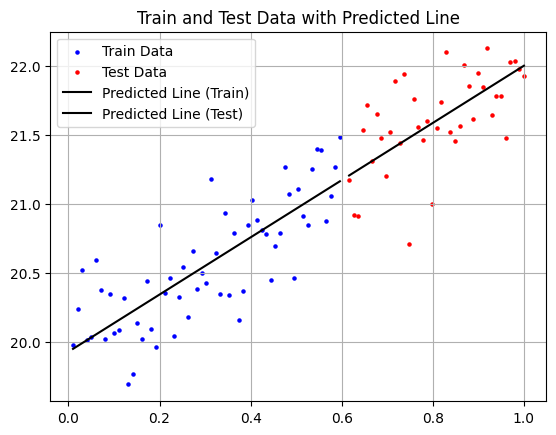

In [8]:

plt.scatter(x_train, y_train, color="blue", s=5, label="Train Data")

plt.scatter(x_test, y_test, color="red", s=5, label="Test Data")

plt.plot(x_train, y_predicted_train, color="black", label="Predicted Line (Train)")
plt.plot(x_test, y_predicted_test, color="black", label="Predicted Line (Test)")

plt.grid(True)
plt.legend() 
plt.title("Train and Test Data with Predicted Line")

plt.show()
